# ***Pokemon EDA***

Dataset taken from : https://www.kaggle.com/datasets/abcsds/pokemon

In [141]:
# Import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Assign the database to a variable

df = pd.read_csv('Pokemon.csv')

## ***Database Exploration***

First let's take a look at the database

In [58]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We can see there are a total of 13 columns. Looks like all the possible Pokemon stats along with their generations and legendary status are all present

Now let's look a little deeper

In [59]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


The Dtypes look correct but looks like there are some null values in the 'Type 2' column

In [60]:
# Let's check out how many nulls

df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [61]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Let's replace the null values in the Type 2 column with an N/A value(Not Applicable)

In [62]:
df['Type 2'].fillna('N/A', inplace=True)



Let's clean the names for the Mega Pokemon

Ex:
Old: VenusaurMega Venusaur Y

New: Mega Venusaur Y

In [63]:

df.Name = df.Name.str.replace(".*(?=Mega)", "")
df.head()


/tmp/ipykernel_288032/146959892.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Name = df.Name.str.replace(".*(?=Mega)", "")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False


Check for duplicates

In [64]:
df[df.duplicated(keep='first')] #Check for duplicates

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


No duplicates

## ***Data Visualization***

Now let's do some plotting with Seaborn

First let's take a look at the Correlation Matrix between the numerical values

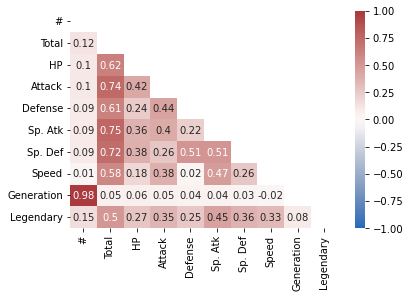

In [65]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

- There is a moderate positive correlation between Legendary status and Total stats
- Also a moderate positive correlation betweem Sp.Def and Def as well as Sp.Def and Sp.Atk

Now let's look at how many Pokemons from each type there are for the Primary Type

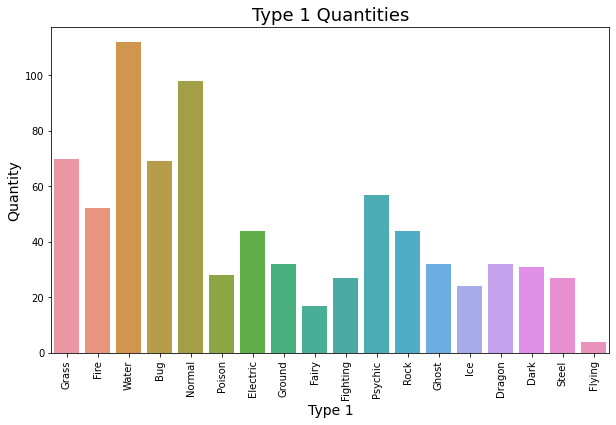

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type 1', data=df)
plt.title('Type 1 Quantities', size=18)
plt.xlabel('Type 1', size=14)
plt.ylabel('Quantity', size=14)
plt.xticks(rotation=90)
plt.show()


There looks like there are more Water types overall followed by Normal, Grass and Bug types. Surprisingly there amount of Flying types are very low.

Now let's look at the same but with their secondary Types

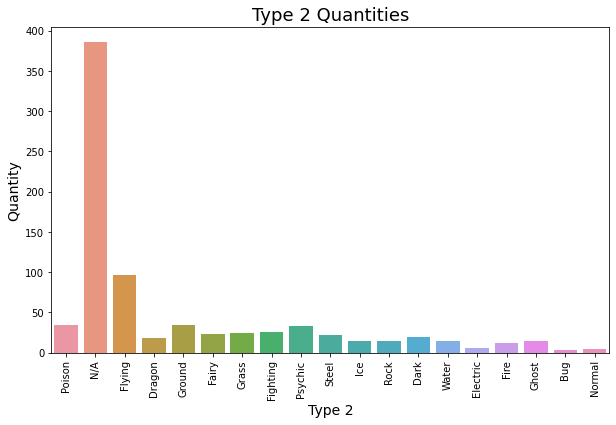

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type 2', data=df)
plt.title('Type 2 Quantities', size=18)
plt.xlabel('Type 2', size=14)
plt.ylabel('Quantity', size=14)
plt.xticks(rotation=90)
plt.show()

Looks like the numbers of Pokemon without any Secondary Types are extremely high. But of those that do have Secondary types it looks like there are more Flying,Psychic,Ground and Poison.

In [68]:
# Now let's look at the raw numbers
# Let's look at both the "Type 1" and "Type 2" variables at the same time to determine which Type shows up more

df[['Type 1', 'Type 2']].stack().value_counts()

N/A         386
Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Dragon       50
Electric     50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64

We can see that Water is the most represented Type showing up in a grand total of 126 Pokemon followed up by Normal, Flying and Grass

## ***Legendary analysis***

Let's further analyze the Legendary Pokemon

First let's create a new dataframe that separates the Legendary Pokemon from the rest

In [69]:
df_temp = df.loc[df["Legendary"] == True]
df_legendary = df_temp.filter(['Name','Legendary', 'Type 1', 'Type 2', 'Generation'], axis=1)
df_legendary

,Name,Legendary,Type 1,Type 2,Generation
156,Articuno,True,Ice,Flying,1
157,Zapdos,True,Electric,Flying,1
158,Moltres,True,Fire,Flying,1
162,Mewtwo,True,Psychic,N/A,1
163,Mega Mewtwo X,True,Psychic,Fighting,1
...,...,...,...,...,...
795,Diancie,True,Rock,Fairy,6
796,Mega Diancie,True,Rock,Fairy,6
797,HoopaHoopa Confined,True,Psychic,Ghost,6
798,HoopaHoopa Unbound,True,Psychic,Dark,6


Now let's see how many Legendaries there are in total

In [70]:
df_legendary['Name'].count()

65

65 total Legendaries

Now let's check out which primary type is the highest for the Legendaries

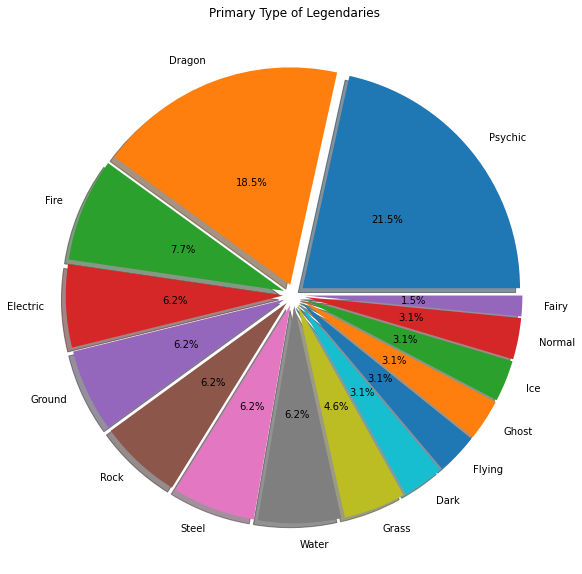

In [73]:
    legendary_pie1 = df_legendary.groupby('Type 1')['Name'].count().sort_values(ascending=False)
    labels = legendary_pie1.keys()
    fig,ax = plt.subplots(figsize=[10,10])
    plt.pie(x = legendary_pie1, explode=[0.05]*len(legendary_pie1), autopct = '%.1f%%', shadow=True, labels=labels, pctdistance = 0.5)
    plt.title('Primary Type of Legendaries')
    plt.show()

Looks like Psychic and Dragon are by far the largest, with a big difference from the rest

Now let's do the same but for the secondary type

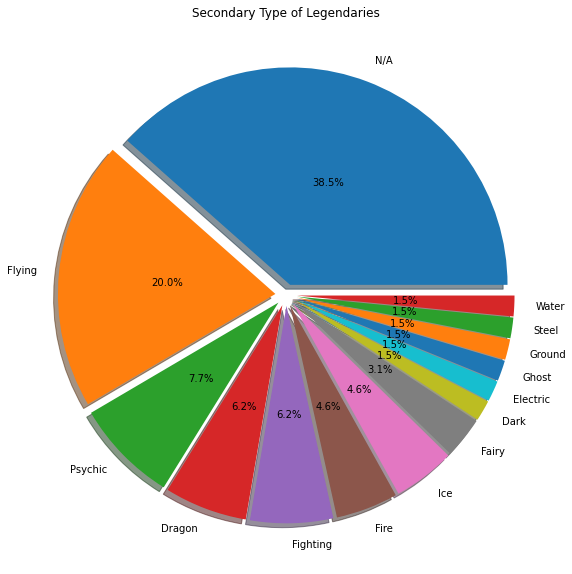

In [74]:
    legendary_pie2 = df_legendary.groupby('Type 2')['Name'].count().sort_values(ascending=False)
    labels = legendary_pie2.keys()
    fig,ax = plt.subplots(figsize=[10,10])
    plt.pie(x = legendary_pie2, explode=[0.05]*len(legendary_pie2), autopct = '%.1f%%', shadow=True, labels=labels, pctdistance = 0.5)
    plt.title('Secondary Type of Legendaries')
    plt.show()

Looks like most Legendaries don't have a second type. But for the ones that do, Flying is by the largest with a big difference from the rest

Now let's look at the raw numbers

In [77]:
legendary_count1 = df_legendary['Type 1'].value_counts()
legendary_count2 = df_legendary['Type 2'].value_counts()

legendary_count1

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: Type 1, dtype: int64

In [78]:
legendary_count2

N/A         25
Flying      13
Psychic      5
Fighting     4
Dragon       4
Fire         3
Ice          3
Fairy        2
Steel        1
Electric     1
Ground       1
Ghost        1
Dark         1
Water        1
Name: Type 2, dtype: int64

Now a look at which Generation introduced the most Legendaries

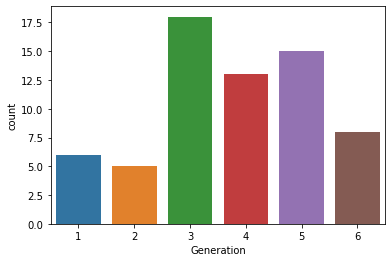

In [76]:
plt.figsize=(10,10)
sns.countplot(x='Generation', data=df_legendary)
plt.show()

Looks like the 3rd Generation introduced more Legendaries, followed by the 5th and 4th

## ***Generations Analysis***

Now let's look at the Generations

Which Generation is the strongest in terms of Total?

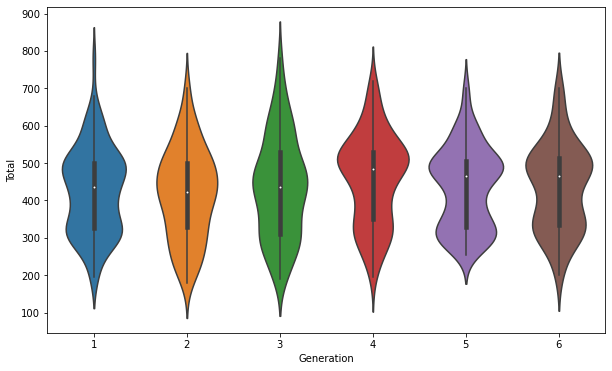

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

In [140]:
plt.subplots(figsize=(10,6))
sns.violinplot(data=df, x='Generation', y='Total')
plt.show()
df.groupby('Generation')['Total'].mean()


Looks like Gen 4 with Gen 3 and 5 coming after

Now let's look at each stat individually and what Generation had the most of each

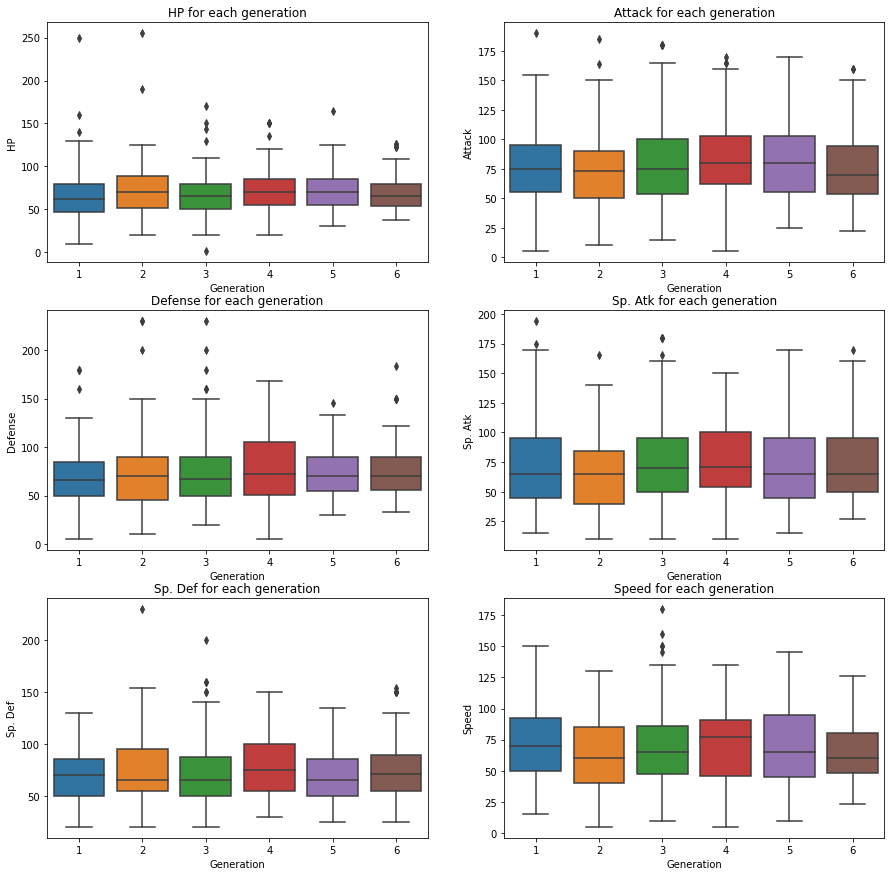

In [138]:
stats=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
k=1
plt.figure(figsize=(15,15))
for i in stats:
    plt.subplot(3,2,k)
    sns.boxplot(y=df[i],x=df.Generation)
    k=k+1
    plt.title(i+str(' for each generation'))




Now let's find out how many Pokemons were introduced by Generation along with their Primary Types

/home/will/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


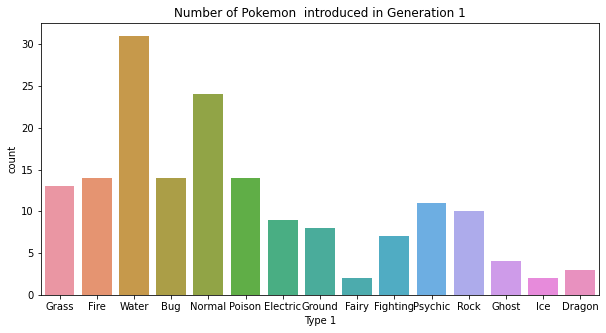

Gen 1 introduced 166 new Pokemons


In [117]:
gen1 = df[df['Generation']==1]
plt.figure(figsize=(10,5))
sns.countplot(gen1['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 1')
gen1['Name'].count()
plt.show()
print(f'Gen 1 introduced {gen1["Name"].count()} new Pokemons')

/home/will/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


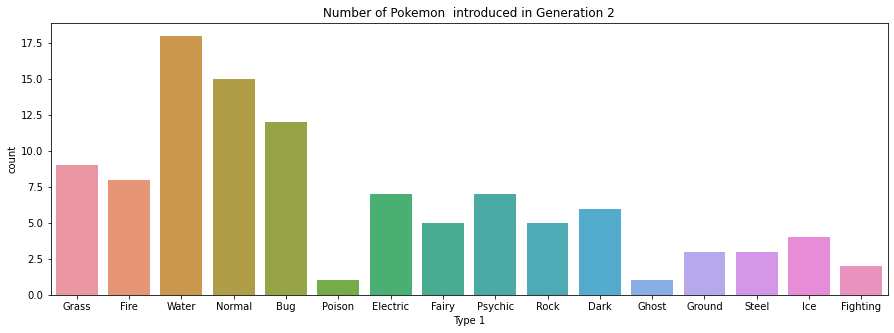

Gen 2 introduced 106 new Pokemons


In [100]:
gen2 = df[df['Generation']==2]
plt.figure(figsize=(10,5))
sns.countplot(gen2['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 2')
gen2['Name'].count()
plt.show()
print(f'Gen 2 introduced {gen2["Name"].count()} new Pokemons')


gen3 = df[df['Generation']==3]
plt.figure(figsize=(10,5))
sns.countplot(gen3['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 3')
gen3['Name'].count()
plt.show()
print(f'Gen 3 introduced {gen3["Name"].count()} new Pokemons')


/home/will/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


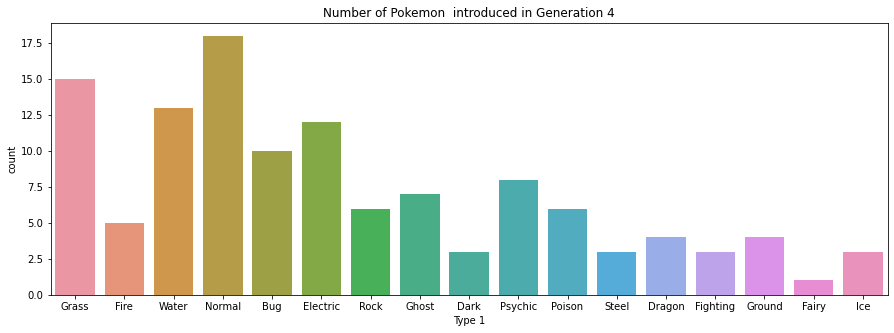

Gen 4 introduced 121 new Pokemons


In [102]:
gen4 = df[df['Generation']==4]
plt.figure(figsize=(10,5))
sns.countplot(gen4['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 4')
gen4['Name'].count()
plt.show()
print(f'Gen 4 introduced {gen4["Name"].count()} new Pokemons')


/home/will/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


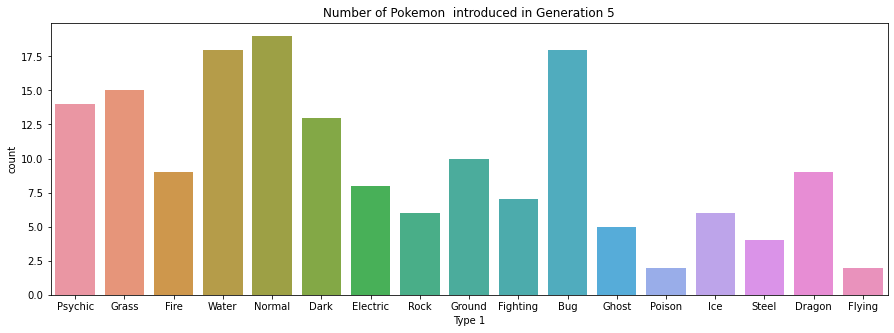

Gen 5 introduced 165 new Pokemons


In [115]:
gen5 = df[df['Generation']==5]
plt.figure(figsize=(10,5))
sns.countplot(gen5['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 5')
gen5['Name'].count()
plt.show()
print(f'Gen 5 introduced {gen5["Name"].count()} new Pokemons')


/home/will/.conda/envs/minimal_ds/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


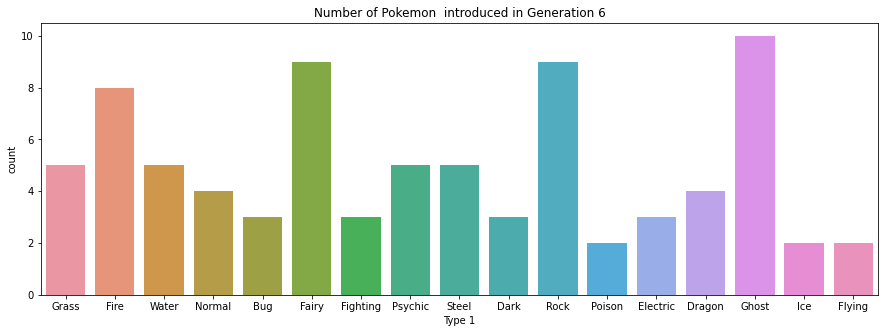

Gen 6 introduced 82 new Pokemons


In [114]:
gen6 = df[df['Generation']==6]
plt.figure(figsize=(10,5))
sns.countplot(gen6['Type 1'])
plt.title('Number of Pokemon  introduced in Generation 6')
plt.show()
print(f'Gen 6 introduced {gen6["Name"].count()} new Pokemons')

Looks like Gen 1 introduced the most Pokemon with 166 while Gen 6 introduced the least with 82 only

Now let's check the average number of Pokemons introduced by Generation

In [113]:
average_introduce = (gen1["Name"].count() + gen2["Name"].count() + gen3["Name"].count() + gen4["Name"].count() + gen5["Name"].count() + gen6["Name"].count()) / 6
print(f"The average number of Pokemons introduced by Generation is: {average_introduce}")

The average number of Pokemons introduced by Generation is: 133.33333333333334


## ***Conclusions***

* There is a surprisingly low amount of Pokemon that have Flying as their main type but in contrast Flying is by far the largest secondary type which serves to elevate it to the 3rd most represented type overall
* Water is by far the most represented type with 126 total representatives, a total of 24 more Pokemon than the second place
* On the other hand, Ice is the least represented Type, only having 38 (88 less than the first place!) which is kind of surprising considering it's been in the game since the beginning
* Psychic and Dragon are by far the most represented Primary types for Legendaries with Fire, Electric and Water coming way behind
* Most Legendaries don't have a Secondary type, but among those that do Flying is by far the most represented type, with Psychic, Fighting and Dragon coming in way behind
* The 3rd Generation introduced the most amount of Legendaries
* Gen 4 is the strongest Generation with highest amount of Total average
* Gen 1 introduced the most Pokemons while Gen 6 introduced the least.
* The average number of Pokemons introduced each Generation is 133.3